In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
r="winequality-red.csv"
datos=pd.read_csv(r,sep=";")
mapping={3:0,4:0,5:0,6:1,7:1,8:1} # Cambiar valores a 0 y 1
datos=datos.replace({"quality":mapping})
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


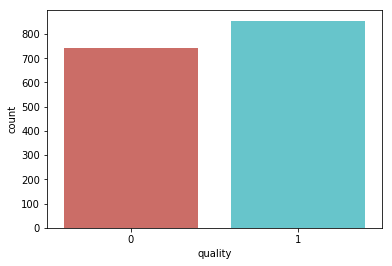

In [4]:
X=datos.drop(["quality"],axis=1)
y=datos["quality"]
sns.countplot(x="quality",data=datos,palette="hls")
plt.show()

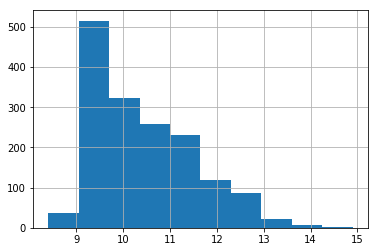

In [7]:
datos.alcohol.hist()
plt.show()

In [8]:
X=datos.drop(["quality"],axis=1).values
y=datos["quality"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=397)
X_test.shape

(320, 11)

In [9]:
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

Entrenamiento del modelo

In [16]:
logreg=LogisticRegression()
logreg.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Prueba y evaluación de desempeño del modelo

In [14]:
predict=logreg.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[108  42]
 [102  68]]
             precision    recall  f1-score   support

          0       0.51      0.72      0.60       150
          1       0.62      0.40      0.49       170

avg / total       0.57      0.55      0.54       320



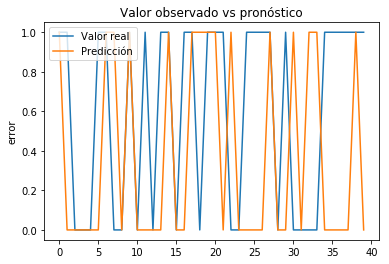

In [15]:
plt.plot(y_test[:40], label='Valor real')
plt.plot(predict[:40], label='Predicción')
plt.title("Valor observado vs pronóstico")
plt.ylabel('error')
plt.legend(loc=2)
plt.show()

Selección de características

In [13]:
rfe= RFE(logreg)
ref=rfe.fit(X_train_scaled,y_train)
ref.support_
ref.ranking_

array([5, 1, 4, 7, 1, 2, 1, 6, 3, 1, 1])